In [2]:
# !pip3 install --upgrade twarc
# !twarc2 configure # Run this on command line first if you are running this locally
# !pip3 install --upgrade twarc-csv

In [ ]:
# !twarc2 search "putin annex ukraine" ./ignored_data/ukrain_annex.jsonl --start-time 2022-09-30 --end-time 2022-10-2 --limit 1000000

# Converting the JSONL into CSV

In [8]:
# !twarc2 csv ignored_data/annex.jsonl ignored_data/annex.csv --input-data-type tweets --extra-input-columns "edit_controls.edits_remaining,edit_history_tweet_ids,edit_controls.editable_until,edit_controls.is_edit_eligible" # convert to CSV

100%|████████████████| Processed 257M/257M of input file [00:33<00:00, 8.08MB/s]

ℹ️
Parsed 33511 tweets objects from 337 lines in the input file.
Wrote 33511 rows and output 78 columns in the CSV.



# Initial EDA of Annexation

## Load in the data

In [11]:
import pandas as pd

df = pd.read_csv("./ignored_data/annex.csv")

/home/soldier/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (20,21,23,41,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
df.head(30)

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,...,geo.place_id,geo.place_type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 73,edit_controls.edits_remaining,edit_history_tweet_ids,edit_controls.editable_until,edit_controls.is_edit_eligible
33510,1575636552964636673,1575636552964636673,NaN,1.575579e+18,NaN,1252246845998477314,NaN,2.758100e+09,NaN,2022-09-30 00:00:02+00:00,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575636552964636673""]",2022-09-30T00:30:02.000Z,False
33509,1575636601367142404,1575636601367142404,NaN,NaN,NaN,1333283589291601923,NaN,NaN,NaN,2022-09-30 00:00:14+00:00,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575636601367142404""]",2022-09-30T00:30:14.000Z,True
33508,1575636689049260032,1575636689049260032,NaN,1.575579e+18,NaN,808478845,NaN,2.758100e+09,NaN,2022-09-30 00:00:35+00:00,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575636689049260032""]",2022-09-30T00:30:35.000Z,False
33507,1575636695902523392,1575636695902523392,NaN,NaN,NaN,325513840,NaN,NaN,NaN,2022-09-30 00:00:36+00:00,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575636695902523392""]",2022-09-30T00:30:36.000Z,True
33506,1575636814064685056,1575636814064685056,NaN,1.575599e+18,NaN,1420470828,NaN,4.240834e+08,NaN,2022-09-30 00:01:05+00:00,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575636814064685056""]",2022-09-30T00:31:05.000Z,False
33505,1575637064066138112,1575637064066138112,NaN,NaN,NaN,1021020774746984450,NaN,NaN,NaN,2022-09-30 00:02:04+00:00,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575637064066138112""]",2022-09-30T00:32:04.000Z,True
33504,1575637143833432064,1575637143833432064,NaN,1.575621e+18,NaN,779175673264902144,NaN,1.462549e+18,NaN,2022-09-30 00:02:23+00:00,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575637143833432064""]",2022-09-30T00:32:23.000Z,False
33503,1575637173671694336,1575637173671694336,NaN,1.575579e+18,NaN,1499023585440116744,NaN,2.758100e+09,NaN,2022-09-30 00:02:30+00:00,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575637173671694336""]",2022-09-30T00:32:30.000Z,False
33502,1575637245830500353,1575637245830500353,NaN,1.575637e+18,NaN,88759671,NaN,1.021021e+18,NaN,2022-09-30 00:02:47+00:00,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575637245830500353""]",2022-09-30T00:32:47.000Z,False
33501,1575637304596570114,1575637304596570114,NaN,1.575427e+18,NaN,3063886144,NaN,1.682715e+07,NaN,2022-09-30 00:03:01+00:00,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575637304596570114""]",2022-09-30T00:33:01.000Z,False


In [13]:
df.describe()

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,public_metrics.like_count,...,author.id,author.pinned_tweet_id,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,author.withheld.scope,author.withheld.copyright,Unnamed: 73,edit_controls.edits_remaining
count,3.351100e+04,3.351100e+04,5.390000e+02,3.035900e+04,9.800000e+01,3.351100e+04,5.680000e+02,3.035900e+04,9.800000e+01,33511.000000,...,3.351100e+04,1.168500e+04,3.351100e+04,33511.000000,33511.000000,3.351100e+04,0.0,0.0,0.0,33511.0
mean,1.575944e+18,1.575827e+18,1.575769e+18,1.575862e+18,1.572453e+18,6.074363e+17,4.784592e+17,3.299327e+17,2.994826e+17,11011.774104,...,6.074363e+17,1.396436e+18,2.979378e+04,2158.263018,165.196562,8.278450e+04,NaN,NaN,NaN,5.0
std,1.401201e+14,7.851619e+15,1.748847e+15,1.318431e+14,1.509657e+16,6.480188e+17,6.182716e+17,5.802600e+17,5.311592e+17,12099.679356,...,6.480188e+17,2.327907e+17,8.069439e+05,7544.319356,3055.061826,1.693541e+05,NaN,NaN,NaN,0.0
min,1.575637e+18,8.537347e+17,1.542603e+18,1.572310e+18,1.496708e+18,9.306000e+03,4.283330e+05,7.592510e+05,7.421430e+05,0.000000,...,9.306000e+03,7.890400e+08,0.000000e+00,0.000000,0.000000,1.000000e+00,NaN,NaN,NaN,5.0
25%,1.575858e+18,1.575858e+18,1.575827e+18,1.575833e+18,1.575818e+18,3.892314e+08,8.296723e+07,6.535710e+07,2.804424e+07,343.000000,...,3.892314e+08,1.318320e+18,8.800000e+01,221.000000,0.000000,5.677500e+03,NaN,NaN,NaN,5.0
50%,1.575901e+18,1.575900e+18,1.575869e+18,1.575859e+18,1.575848e+18,4.329207e+09,1.704340e+09,7.017260e+08,4.019585e+08,5931.000000,...,4.329207e+09,1.501875e+18,4.070000e+02,758.000000,2.000000,2.491300e+04,NaN,NaN,NaN,5.0
75%,1.576000e+18,1.575998e+18,1.575970e+18,1.575870e+18,1.575930e+18,1.296713e+18,1.160442e+18,7.117605e+17,5.338998e+17,23639.000000,...,1.296713e+18,1.560703e+18,1.644000e+03,2420.000000,13.000000,8.744000e+04,NaN,NaN,NaN,5.0
max,1.576361e+18,1.576361e+18,1.576357e+18,1.576347e+18,1.576307e+18,1.576343e+18,1.570408e+18,1.574488e+18,1.535750e+18,32973.000000,...,1.576343e+18,1.576898e+18,6.004445e+07,616495.000000,217533.000000,4.136783e+06,NaN,NaN,NaN,5.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33511 entries, 0 to 33510
Data columns (total 78 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     33511 non-null  int64  
 1   conversation_id                        33511 non-null  int64  
 2   referenced_tweets.replied_to.id        539 non-null    float64
 3   referenced_tweets.retweeted.id         30359 non-null  float64
 4   referenced_tweets.quoted.id            98 non-null     float64
 5   author_id                              33511 non-null  int64  
 6   in_reply_to_user_id                    568 non-null    float64
 7   retweeted_user_id                      30359 non-null  float64
 8   quoted_user_id                         98 non-null     float64
 9   created_at                             33511 non-null  object 
 10  text                                   33511 non-null  object 
 11  la

In [31]:
df.count()

id                                 33511
conversation_id                    33511
referenced_tweets.replied_to.id      539
referenced_tweets.retweeted.id     30359
referenced_tweets.quoted.id           98
                                   ...  
edit_history_tweet_ids             33511
edit_controls.editable_until       33511
edit_controls.is_edit_eligible     33511
hour                               33511
tweet_val                          33511
Length: 80, dtype: int64

### Converting data time

In [17]:
# convert the 'created_at' column to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# sort by time
df.sort_values(by=['created_at'], ascending=True, inplace=True)

# Check the format of 'created_at' column
df.created_at.head()

df['hour'] = df['created_at'].dt.strftime("%d/%b/%Y %H")
df['hour'] = pd.to_datetime(df['hour'])
df['tweet_val'] = 1
df = df.sort_values(by=['hour'], ascending=True)

# Drop Columns

In [27]:
columns_to_be_kept = ['id',
                      'hour',
                      'tweet_val',
                      'conversation_id',
                      # 'referenced_tweets.replied_to.id',
                      #  'referenced_tweets.retweeted.id',
                      #     'referenced_tweets.quoted.id',
                                            'author_id',
                                  # 'in_reply_to_user_id',
                                    'retweeted_user_id',
                                       # 'quoted_user_id',
                      'created_at',
                      'text',
                      'lang',
                                            'source',
                         'public_metrics.like_count',
                        'public_metrics.quote_count',
                        'public_metrics.reply_count',
                      'public_metrics.retweet_count',
                                    'reply_settings',
                                'possibly_sensitive',
                                    # 'withheld.scope',
                                'withheld.copyright',
                                      'withheld.country_codes',
                              'entities.annotations',
                                 'entities.cashtags',
                      'entities.hashtags',
                      'entities.mentions',
                      # 'entities.urls',
                      'context_annotations',
                      #   'attachments.media',
                      # 'attachments.media_keys',
                      # 'attachments.poll.duration_minutes',
                      #     'attachments.poll.end_datetime',
                      #                      'attachments.poll.id',
                      #          'attachments.poll.options',
                      #    'attachments.poll.voting_status',
                      #              'attachments.poll_ids',
                                              'author.id',
                                      'author.created_at',
                                        'author.username',
                                            'author.name',
                                     'author.description',
                      'author.entities.description.cashtags',
                      'author.entities.description.hashtags',
                      'author.entities.description.mentions',
                            # 'author.entities.description.urls',
                            #         'author.entities.url.urls',
                      'author.location',
                      'author.pinned_tweet_id',
                      'author.profile_image_url',
                      'author.protected',
                      'author.public_metrics.followers_count',
                      'author.public_metrics.following_count',
                         'author.public_metrics.listed_count',
                          'author.public_metrics.tweet_count',
                      #                            'author.url',
                      #                       'author.verified',
                      #                 'author.withheld.scope',
                      #             'author.withheld.copyright',
                      #         'author.withheld.country_codes',
                      # 'geo.coordinates.coordinates',
                      # 'geo.coordinates.type',
                      # 'geo.country',
                      # 'geo.country_code',
                      # 'geo.full_name',
                      # 'geo.geo.bbox',
                      # 'geo.geo.type',
                      # 'geo.id',
                      # 'geo.name',
                      # 'geo.place_id',
                      # 'geo.place_type',
                      # '__twarc.retrieved_at',
                      #          '__twarc.url',
                      #      '__twarc.version',
                      ]

drop_columns = [ele for ele in list(df.columns.array) if ele not in columns_to_be_kept]

data = df.drop(columns=drop_columns)

# Table Update

In [28]:
data.head(30)

,id,conversation_id,author_id,retweeted_user_id,created_at,text,lang,source,public_metrics.like_count,public_metrics.quote_count,...,author.location,author.pinned_tweet_id,author.profile_image_url,author.protected,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.listed_count,author.public_metrics.tweet_count,hour,tweet_val
33510,1575636552964636673,1575636552964636673,1252246845998477314,2.758100e+09,2022-09-30 00:00:02+00:00,Goodnight #Ukraine. I don't care about Putin's...,en,Twitter Web App,16541,83,...,NaN,NaN,https://pbs.twimg.com/profile_images/130967877...,False,49,175,2,29668,2022-09-30,1
33409,1575645449880412161,1575645449880412161,1532369686091948034,2.758100e+09,2022-09-30 00:35:23+00:00,Goodnight #Ukraine. I don't care about Putin's...,en,Twitter for iPad,16541,83,...,"Kilkenny, Ireland",NaN,https://pbs.twimg.com/profile_images/156051399...,False,14,19,0,4819,2022-09-30,1
33408,1575645553697984512,1575645553697984512,1908013748,NaN,2022-09-30 00:35:48+00:00,Ukraine war: Putin to annex Ukrainian regions;...,en,Twitter for iPhone,2,0,...,Washington DC,NaN,https://pbs.twimg.com/profile_images/861581373...,False,4307,2981,43,41229,2022-09-30,1
33407,1575645554331521025,1575645554331521025,1136166056609796096,4.240834e+08,2022-09-30 00:35:48+00:00,We are approaching a critical phase of the war...,en,Twitter Web App,183,10,...,NaN,NaN,https://pbs.twimg.com/profile_images/155408074...,False,322,2271,2,60593,2022-09-30,1
33406,1575645751421857792,1575645751421857792,1497717095089557515,1.462549e+18,2022-09-30 00:36:35+00:00,The Kremlin spokesperson Dmitry Peskov has sai...,en,Twitter for iPhone,1077,7,...,"Texas, USA",1.551946e+18,https://pbs.twimg.com/profile_images/149772749...,False,362,846,2,9602,2022-09-30,1
33405,1575645942761500672,1575645942761500672,1499892447341854724,2.758100e+09,2022-09-30 00:37:21+00:00,Goodnight #Ukraine. I don't care about Putin's...,en,Twitter Web App,16541,83,...,"Whyalla, South Australia",1.501154e+18,https://pbs.twimg.com/profile_images/149989259...,False,53,112,0,4136,2022-09-30,1
33404,1575646055244259328,1575646055244259328,1557388197411307523,2.758100e+09,2022-09-30 00:37:48+00:00,Goodnight #Ukraine. I don't care about Putin's...,en,Twitter for Android,16541,83,...,NaN,NaN,https://pbs.twimg.com/profile_images/155738846...,False,3,87,1,93,2022-09-30,1
33403,1575646082297921536,1575646082297921536,1241797017694765056,NaN,2022-09-30 00:37:54+00:00,How the actual Fuck does he still breathe? \n\...,en,Twitter for Android,1,1,...,United States,NaN,https://pbs.twimg.com/profile_images/157601418...,False,3498,3356,0,13806,2022-09-30,1
33410,1575645408117764098,1575645408117764098,1704037459,2.758100e+09,2022-09-30 00:35:14+00:00,Goodnight #Ukraine. I don't care about Putin's...,en,Twitter for Android,16541,83,...,NaN,NaN,https://pbs.twimg.com/profile_images/378800000...,False,46,279,0,1405,2022-09-30,1
33402,1575646169937502209,1575646169937502209,1017922214539087874,1.462549e+18,2022-09-30 00:38:15+00:00,The Kremlin spokesperson Dmitry Peskov has sai...,en,Twitter Web App,1077,7,...,AZ,1.178476e+18,https://pbs.twimg.com/profile_images/153072080...,False,13861,14985,7,206330,2022-09-30,1


### Tweets Overtime (Hourly)

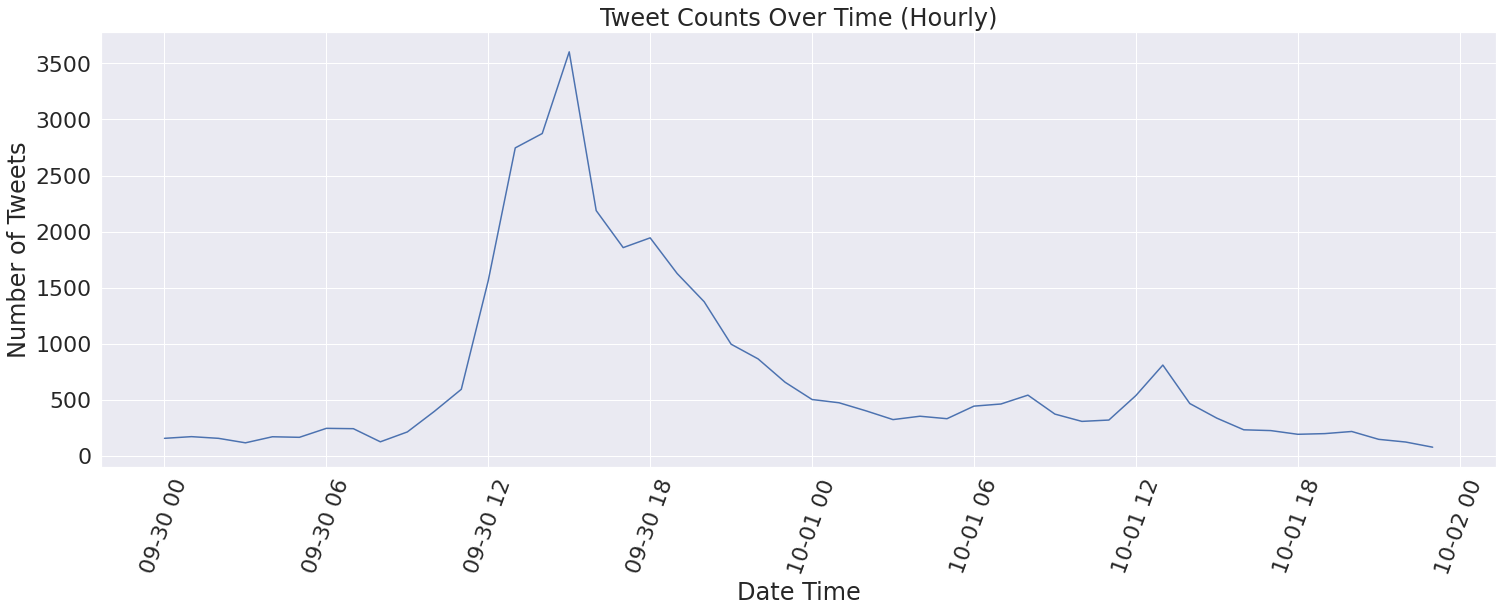

In [29]:
import matplotlib.pyplot as plt
import seaborn as sb

fig, ax = plt.subplots(figsize=(25, 8))
plt.xticks(rotation=70)
sb.set(font_scale=2)
data_viz = data.groupby(['hour'], as_index=False)['tweet_val'].sum()
data_viz = data_viz.sort_values(by=['hour'], ascending=True)
ax2 = sb.lineplot(data=data_viz, x="hour", y="tweet_val")
ax2.set(title="Tweet Counts Over Time (Hourly)", xlabel="Date Time", ylabel="Number of Tweets")
plt.draw()

#### Most common languages

[Text(0, 0, '33240'),
 Text(0, 0, '67'),
 Text(0, 0, '48'),
 Text(0, 0, '39'),
 Text(0, 0, '21'),
 Text(0, 0, '17'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '9'),
 Text(0, 0, '8'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

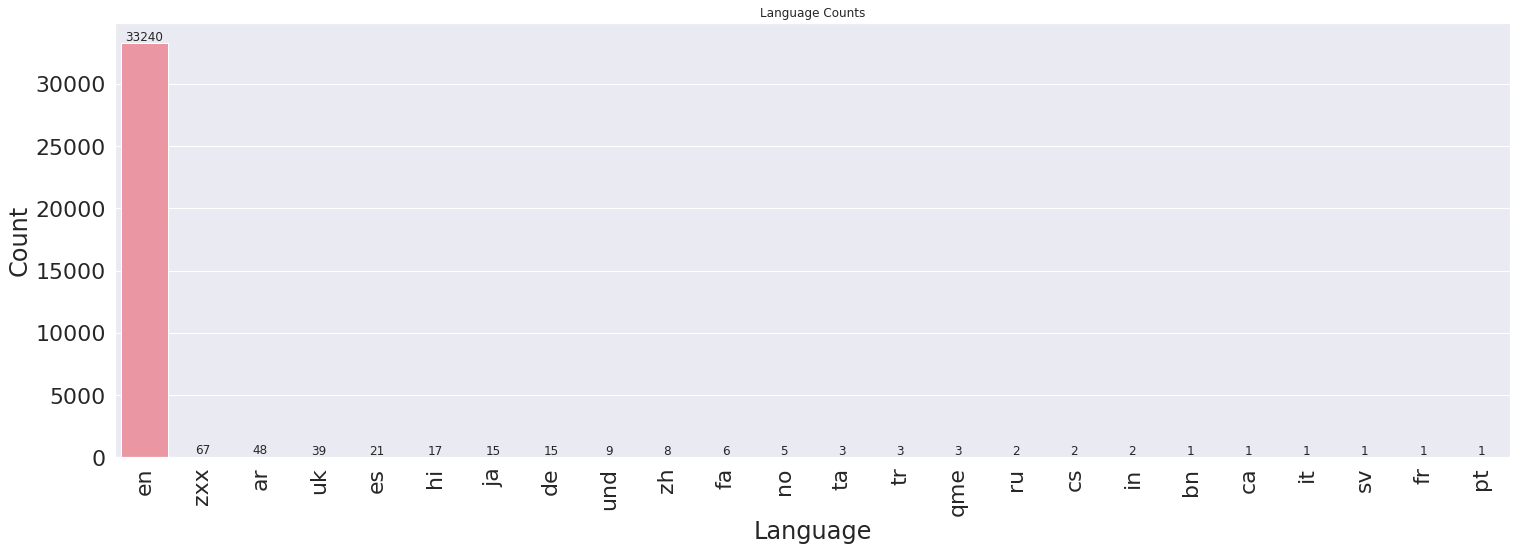

In [30]:
from collections import Counter

languagesTermFreqCounter = Counter()
languagesTermFreqCounter.update(data["lang"])
filtered_words_df = pd.DataFrame(data=languagesTermFreqCounter.most_common(50), columns=['Language', 'Count'])
fig, ax = plt.subplots(figsize=(25, 8))
plt.xticks(rotation=90)
sb.set(font_scale=1)
ax2 = sb.barplot(data=filtered_words_df, x="Language", y="Count", ax=ax)
ax2.set(title="Language Counts")
ax2.bar_label(ax2.containers[0])
print(":)")

## Translating the non english tweets into english

In [ ]:
!pip install deep-translator

In [81]:
from deep_translator import GoogleTranslator
import time, nltk, pprint

def clean_translate_tweet(row):
    row['translated'] = GoogleTranslator(source='auto', target='en').translate(text=row['text'])
    time.sleep(0.3)
    row['translated'] = re.sub("@[A-Za-z0-9]+", " ", row['translated'])
    row['translated'] = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", " ", row['translated'])
    row['translated'] = re.sub("[^A-Za-z0-9]", " ", row['translated'])
    return row

clean_data = data.apply(clean_translate_tweet, axis = 1)
clean_data

ConnectionError: HTTPSConnectionPool(host='translate.google.com', port=443): Max retries exceeded with url: /m?tl=en&sl=auto&q=As+he+announces+the+Kremlin%27s+intention+to+illegally+annex+nearly+a+fifth+of+Ukraine%2C+Russian+President+Vladimir+Putin+says+the+people+who+live+in+these+regions+%22are+becoming+our+citizens+forever%22+https%3A%2F%2Ft.co%2FMco3iwWgaj+https%3A%2F%2Ft.co%2FTFPiydMlwi (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fc8144af1c0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

In [ ]:
clean_data.to_csv('./ignored_data/clean_annex.csv')

# Generate Graph Networks

In [73]:
!conda install -y -c rapidsai -c nvidia -c conda-forge cugraph=21.08 python=3.8 cudatoolkit=11.0 cudf=0.6.1.post1
!pip3 install networkx
!pip3 install twarc-network
!pip3 install numpy
!pip3 install scipy
!pip3 install tqdm
!pip3 install python-igraph
!pip3 install fa2

  Using cached cudf-0.6.1.post1.tar.gz (1.1 kB)
  ERROR: Command errored out with exit status 1:
   command: /home/soldier/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-4km5h1mj/cudf_432804e4aad5479dbdb6d75adfbffc47/setup.py'"'"'; __file__='"'"'/tmp/pip-install-4km5h1mj/cudf_432804e4aad5479dbdb6d75adfbffc47/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-2lgixquh
       cwd: /tmp/pip-install-4km5h1mj/cudf_432804e4aad5479dbdb6d75adfbffc47/
  Complete output (25 lines):
  running bdist_wheel
  running build
  installing to build/bdist.linux-x86_64/wheel
  running install
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "/tmp/pip-install-4km5h1mj/cudf_432804e4aad5479dbdb6d75adfbffc47/setup.py", line 18, in <module>
      setup(name=pkg,
    File 

Exception ignored in: <function _releaseLock at 0x7fc87cf03ca0>
Traceback (most recent call last):
  File "/home/soldier/anaconda3/lib/python3.8/logging/__init__.py", line 223, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 


^C
Traceback (most recent call last):
  File "/home/soldier/anaconda3/bin/pip3", line 7, in <module>
    from pip._internal.cli.main import main
  File "/home/soldier/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/main.py", line 8, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/home/soldier/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/autocompletion.py", line 9, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/home/soldier/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/main_parser.py", line 7, in <module>
    from pip._internal.cli import cmdoptions
  File "/home/soldier/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/cmdoptions.py", line 22, in <module>
    from pip._internal.cli.progress_bars import BAR_TYPES
  File "/home/soldier/anaconda3/lib/python3.8/site-packages/pip/_internal/cli/progress_bars.py", line 9, in <module>
    from pip._internal.utils.logging import get_inde

### Generate the networks into GML format and CSV format
All types of interactions are used as edges: Retweet, reply or quote in the case of tweets; retweet, reply, quote or mention in the case of users

The possible edge attributes are the following:
- **type**: When the nodes are tweets, one of the following values: retweet, reply or quote.
- **retweet**: When the nodes are users, the number of retweets the source has made to the target.
- **reply**: When the nodes are users, the number of replies the source has made to the target.
- **quote**: When the nodes are users, the number of quotes the source has made to the target.
- **mention**: When the nodes are users, the number of mentions the source has made to the target.
- **weight**: When the nodes are users, the sum of retweet, reply, quote and mention. When the nodes are hashtags, the number of tweets that contained both hashtags.

In [36]:
!twarc2 network ./ignored_data/clean_annex.csv --format gml ./ignored_data/annex.gml

In [35]:
!twarc2 network ./ignored_data/clean_annex.csv --format csv ./ignored_data/network.csv

In [37]:
!twarc2 network ./ignored_data/clean_annex.csv ./ignored_data/tweets.html --min-component-size 3

In [ ]:
!twarc2 network ./ignored_data/clean_annex.csv --format gexf ./ignored_data/network.gexf

### Network Check

In [45]:
import pandas as pd

net_csv = pd.read_csv("./ignored_data/network.csv")

In [46]:
net_csv.head(30)

,Source,Target,Weight,Retweet,Reply,Quote,Mention
0,Stewary_,BBCBreaking,{'weight': 1,'retweet': 1,'reply': 0,'quote': 0,'mention': 0}
1,thislifegood,SecBlinken,{'weight': 1,'retweet': 1,'reply': 0,'quote': 0,'mention': 0}
2,FrankieVallins,9NewsSyd,{'weight': 1,'retweet': 1,'reply': 0,'quote': 0,'mention': 0}
3,9NewsSyd,CGreenbank9,{'weight': 1,'retweet': 0,'reply': 0,'quote': 0,'mention': 1}
4,9NewsSyd,9NewsAUS,{'weight': 1,'retweet': 1,'reply': 0,'quote': 0,'mention': 0}
5,Cornpop131,aintscarylarry,{'weight': 1,'retweet': 1,'reply': 0,'quote': 0,'mention': 0}
6,breemenpedia,anneapplebaum,{'weight': 1,'retweet': 1,'reply': 0,'quote': 0,'mention': 0}
7,anneapplebaum,Lawrence,{'weight': 1,'retweet': 1,'reply': 0,'quote': 0,'mention': 0}
8,anneapplebaum,axelletess,{'weight': 1,'retweet': 1,'reply': 0,'quote': 0,'mention': 0}
9,anneapplebaum,TheAtlantic,{'weight': 1,'retweet': 1,'reply': 0,'quote': 0,'mention': 0}


In [42]:
net_csv.describe()

,Stewary_,BBCBreaking,{'weight': 1,'retweet': 1,'reply': 0,'quote': 0,'mention': 0}
count,32770,32768,32770,32770,32770,32770,32770
unique,25357,1518,5,5,5,2,6
top,StevenG15689824,DmytroKuleba,{'weight': 1,'retweet': 1,'reply': 0,'quote': 0,'mention': 0}
freq,72,4996,31927,29843,32272,32672,30169


In [43]:
net_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Stewary_        32770 non-null  object
 1   BBCBreaking     32768 non-null  object
 2   {'weight': 1    32770 non-null  object
 3    'retweet': 1   32770 non-null  object
 4    'reply': 0     32770 non-null  object
 5    'quote': 0     32770 non-null  object
 6    'mention': 0}  32770 non-null  object
dtypes: object(7)
memory usage: 1.8+ MB


In [44]:
net_csv.count()

Stewary_          32770
BBCBreaking       32768
{'weight': 1      32770
 'retweet': 1     32770
 'reply': 0       32770
 'quote': 0       32770
 'mention': 0}    32770
dtype: int64

# Fix the object into columns

In [70]:
import re

df = pd.read_csv("./ignored_data/network.csv", names=['Source', 'Target', 'Weight', 'Retweet', 'Reply', 'Quote', 'Mention'])

# Credit to arlo for these 4 lines
df['Weight'] = df['Weight'].map(lambda y: [int(x) for x in y.split() if x.isdigit()][0])
df['Retweet'] = df['Retweet'].map(lambda y: [int(x) for x in y.split() if x.isdigit()][0])
df['Reply'] = df['Reply'].map(lambda y: [int(x) for x in y.split() if x.isdigit()][0])
df['Quote'] = df['Quote'].map(lambda y: [int(x) for x in y.split() if x.isdigit()][0])

# Fix for the mentions column
def fix_mention(y):
    nums = re.findall("\d", y)
    if len(nums) > 0:
        return nums[0]
    else:
        return 0


df['Mention'] = df['Mention'].map(fix_mention)

In [71]:
df.head(30)

,Source,Target,Weight,Retweet,Reply,Quote,Mention
0,Stewary_,BBCBreaking,1,1,0,0,0
1,thislifegood,SecBlinken,1,1,0,0,0
2,FrankieVallins,9NewsSyd,1,1,0,0,0
3,9NewsSyd,CGreenbank9,1,0,0,0,1
4,9NewsSyd,9NewsAUS,1,1,0,0,0
5,Cornpop131,aintscarylarry,1,1,0,0,0
6,breemenpedia,anneapplebaum,1,1,0,0,0
7,anneapplebaum,Lawrence,1,1,0,0,0
8,anneapplebaum,axelletess,1,1,0,0,0
9,anneapplebaum,TheAtlantic,1,1,0,0,0


### Save fixed network to CSV

In [72]:
df.to_csv('./ignored_data/network_fixed.csv')

In [75]:
import networkx as nx

net = nx.from_pandas_edgelist(df, source="Source", target="Target", edge_attr='Weight')
nx.write_gexf(net, "./ignored_data/annex.gexf")

In [1]:
import pandas as pd

tweets = pd.read_csv('./ignored_data/annex.csv')
pd_parts = pd.read_csv('./ignored_data/annex_ecg.csv')
top_5_groups_ids = pd_parts["partition"].value_counts().rename_axis('unique_values').reset_index(name='counts')["unique_values"][1:6].values.tolist()

groups = dict()
for partition in top_5_groups_ids:
    groups.__setitem__(partition, pd_parts.loc[pd_parts["partition"] == partition]["vertex"].values.tolist())

# pd_parts["partition"].sort_values(ascending=False)

/home/soldier/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (20,21,23,41,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [45]:
tweets.set_index('author.username')
tweets_map = dict()
for key, group in groups.items():
    tweets_map[key] = tweets.loc[tweets["author.username"].isin(group)]["text"]
tweets_map[2]

/home/soldier/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


55       Day after Putin's annex rant. Russia's been fo...
143      Day after Putin's annex rant. Russia's been fo...
149      Day after Putin's annex rant. Russia's been fo...
150      Day after Putin's annex rant. Russia's been fo...
164      Day after Putin's annex rant. Russia's been fo...
                               ...                        
33497    Goodnight #Ukraine. I don't care about Putin's...
33499    Goodnight #Ukraine. I don't care about Putin's...
33503    Goodnight #Ukraine. I don't care about Putin's...
33508    Goodnight #Ukraine. I don't care about Putin's...
33510    Goodnight #Ukraine. I don't care about Putin's...
Name: text, Length: 1621, dtype: object

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn
from wordcloud import WordCloud
import math
import numpy as np

def processTweet(text, tokenizer, stopwords):
    """
    Perform tokenisation, normalisation (lower case and stemming) and stopword and twitter keyword removal.

    @param text: tweet text
    @param tokenizer: tokeniser used.
    @param stemmer: stemmer used.
    @param stopwords: list of stopwords used

    @returns: a list of processed tokens
    """

    # covert all to lower case
    text = text.lower()
    # tokenise
    lTokens = tokenizer.tokenize(text)

    # regex pattern for has tags
    regexHashTags = re.compile(r'^#\w+')
    # regex pattern for http
    regexHttp = re.compile(r'http(s*)://')

    # everything after the if is a series of things to process and not include
    # if a regular expression fails to match, it returns None (so in our case if they match then we don't want to include)
    return [tok for tok in set(lTokens)
            if tok not in stopwords and not tok.isdigit() and regexHashTags.match(tok) == None and regexHttp.match(tok) == None]

def display_topics(model, featureNames, numTopWords):
    """
    Prints out the most associated words for each feature.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    @param numTopWords: number of words to print per topic.
    """

    # print out the topic distributions
    for topicId, lTopicDist in enumerate(model.components_):
        print("Topic %d:" % (topicId))
        print(" ".join([featureNames[i] for i in lTopicDist.argsort()[:-numTopWords - 1:-1]]))

def displayWordcloud(model, featureNames):
    """
    Displays the word cloud of the topic distributions, stored in model.

    @param model: lda model.
    @param featureNames: list of strings, representing the list of features/words.
    """


    normalisedComponents = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]

    topicNum = len(model.components_)
    plotColNum = 3
    plotRowNum = int(math.ceil(topicNum / plotColNum))

    for topicId, lTopicDist in enumerate(normalisedComponents):
        lWordProb = {featureNames[i] : wordProb for i,wordProb in enumerate(lTopicDist)}
        wordcloud = WordCloud(background_color='white')
        wordcloud.fit_words(frequencies=lWordProb)
        plt.figure(figsize=(20,20))
        plt.subplot(plotRowNum, plotColNum, topicId+1)
        plt.title('Topic %d:' % (topicId+1))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")

    plt.show(block=True)

def createWordCloud(key, df):
    lTweets = []
    for tokens in df[key]:
        lTweets.append(' '.join(tokens))

    topicNum = 12
    wordNumToDisplay = 15
    featureNum = 1500

    tfVectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=featureNum, stop_words='english')
    tf = tfVectorizer.fit_transform(lTweets)
    tfFeatureNames = tfVectorizer.get_feature_names_out()

    ldaModel = LatentDirichletAllocation(n_components =topicNum, max_iter=10, learning_method='online').fit(tf)
    display_topics(ldaModel, tfFeatureNames, wordNumToDisplay)

    panel = pyLDAvis.sklearn.prepare(ldaModel, tf, tfVectorizer, mds="mmds")
    pyLDAvis.display(panel)

    displayWordcloud(ldaModel, tfFeatureNames)

/home/soldier/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string

punct = list(string.punctuation)
stopwordList = stopwords.words('english') + punct + ['rt', 'via', '...', 'putin', 'ukraine', 'annex']
stopwordList.extend(['"', "'", '“', '’', '…', '”'])

tt = TweetTokenizer()

tweets2 = dict()
for key, group in tweets_map.items():
    tweets2[key] = group.apply(lambda row: processTweet(group["text"], tt, stopwordList), axis=1)

string_to_list = lambda value: [] if value is None or str(value) == "nan" else str(value).split()

tweets3 = dict()
for key, group in tweets2.items():
    tweets3[key] = group.apply(string_to_list)
tweets3

/home/soldier/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [ ]:
for key, group in tweets_map:
    createWordCloud(key, group)

,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,...,geo.place_id,geo.place_type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 73,edit_controls.edits_remaining,edit_history_tweet_ids,edit_controls.editable_until,edit_controls.is_edit_eligible
0,1576361264535642113,1576361264535642113,NaN,1.575824e+18,NaN,1526601519495368705,NaN,5.402612e+06,NaN,2022-10-01T23:59:47.000Z,...,NaN,NaN,2022-10-03T11:30:47+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1576361264535642113""]",2022-10-02T00:29:47.000Z,False
1,1576361129957552134,1576361129957552134,NaN,1.575863e+18,NaN,4885765338,NaN,1.350151e+18,NaN,2022-10-01T23:59:15.000Z,...,NaN,NaN,2022-10-03T11:30:47+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1576361129957552134""]",2022-10-02T00:29:15.000Z,False
2,1576360636870643712,1576360636870643712,NaN,1.575841e+18,NaN,1552504559511019522,NaN,1.718029e+08,NaN,2022-10-01T23:57:17.000Z,...,NaN,NaN,2022-10-03T11:30:47+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1576360636870643712""]",2022-10-02T00:27:17.000Z,False
3,1576360323057324037,1576360323057324037,NaN,1.575846e+18,NaN,1101602163795677185,NaN,1.535750e+18,NaN,2022-10-01T23:56:03.000Z,...,NaN,NaN,2022-10-03T11:30:47+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1576360323057324037""]",2022-10-02T00:26:03.000Z,False
4,1576360249120129024,1576360249120129024,NaN,1.575920e+18,NaN,113755989,NaN,2.971002e+08,NaN,2022-10-01T23:55:45.000Z,...,NaN,NaN,2022-10-03T11:30:47+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1576360249120129024""]",2022-10-02T00:25:45.000Z,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33506,1575636814064685056,1575636814064685056,NaN,1.575599e+18,NaN,1420470828,NaN,4.240834e+08,NaN,2022-09-30T00:01:05.000Z,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575636814064685056""]",2022-09-30T00:31:05.000Z,False
33507,1575636695902523392,1575636695902523392,NaN,NaN,NaN,325513840,NaN,NaN,NaN,2022-09-30T00:00:36.000Z,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575636695902523392""]",2022-09-30T00:30:36.000Z,True
33508,1575636689049260032,1575636689049260032,NaN,1.575579e+18,NaN,808478845,NaN,2.758100e+09,NaN,2022-09-30T00:00:35.000Z,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575636689049260032""]",2022-09-30T00:30:35.000Z,False
33509,1575636601367142404,1575636601367142404,NaN,NaN,NaN,1333283589291601923,NaN,NaN,NaN,2022-09-30T00:00:14.000Z,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575636601367142404""]",2022-09-30T00:30:14.000Z,True


,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,...,geo.place_id,geo.place_type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 73,edit_controls.edits_remaining,edit_history_tweet_ids,edit_controls.editable_until,edit_controls.is_edit_eligible
8468,1575997808498253825,1575997808498253825,NaN,NaN,NaN,1573176556255846405,NaN,NaN,NaN,2022-09-30T23:55:32.000Z,...,NaN,NaN,2022-10-03T11:33:44+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575997808498253825""]",2022-10-01T00:25:32.000Z,True
17510,1575895099636330496,1575895099636330496,NaN,1.575885e+18,NaN,2499735536,NaN,3.091151e+09,NaN,2022-09-30T17:07:25.000Z,...,NaN,NaN,2022-10-03T11:36:51+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575895099636330496""]",2022-09-30T17:37:25.000Z,False
22270,1575867185502867457,1575867185502867457,NaN,1.575859e+18,NaN,2499735536,NaN,2.885494e+09,NaN,2022-09-30T15:16:29.000Z,...,NaN,NaN,2022-10-03T11:38:27+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575867185502867457""]",2022-09-30T15:46:29.000Z,False


In [30]:
tweets = pd.read_csv('./ignored_data/annex.csv')
tweets

/home/soldier/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (20,21,23,41,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,...,geo.place_id,geo.place_type,__twarc.retrieved_at,__twarc.url,__twarc.version,Unnamed: 73,edit_controls.edits_remaining,edit_history_tweet_ids,edit_controls.editable_until,edit_controls.is_edit_eligible
0,1576361264535642113,1576361264535642113,NaN,1.575824e+18,NaN,1526601519495368705,NaN,5.402612e+06,NaN,2022-10-01T23:59:47.000Z,...,NaN,NaN,2022-10-03T11:30:47+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1576361264535642113""]",2022-10-02T00:29:47.000Z,False
1,1576361129957552134,1576361129957552134,NaN,1.575863e+18,NaN,4885765338,NaN,1.350151e+18,NaN,2022-10-01T23:59:15.000Z,...,NaN,NaN,2022-10-03T11:30:47+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1576361129957552134""]",2022-10-02T00:29:15.000Z,False
2,1576360636870643712,1576360636870643712,NaN,1.575841e+18,NaN,1552504559511019522,NaN,1.718029e+08,NaN,2022-10-01T23:57:17.000Z,...,NaN,NaN,2022-10-03T11:30:47+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1576360636870643712""]",2022-10-02T00:27:17.000Z,False
3,1576360323057324037,1576360323057324037,NaN,1.575846e+18,NaN,1101602163795677185,NaN,1.535750e+18,NaN,2022-10-01T23:56:03.000Z,...,NaN,NaN,2022-10-03T11:30:47+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1576360323057324037""]",2022-10-02T00:26:03.000Z,False
4,1576360249120129024,1576360249120129024,NaN,1.575920e+18,NaN,113755989,NaN,2.971002e+08,NaN,2022-10-01T23:55:45.000Z,...,NaN,NaN,2022-10-03T11:30:47+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1576360249120129024""]",2022-10-02T00:25:45.000Z,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33506,1575636814064685056,1575636814064685056,NaN,1.575599e+18,NaN,1420470828,NaN,4.240834e+08,NaN,2022-09-30T00:01:05.000Z,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575636814064685056""]",2022-09-30T00:31:05.000Z,False
33507,1575636695902523392,1575636695902523392,NaN,NaN,NaN,325513840,NaN,NaN,NaN,2022-09-30T00:00:36.000Z,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575636695902523392""]",2022-09-30T00:30:36.000Z,True
33508,1575636689049260032,1575636689049260032,NaN,1.575579e+18,NaN,808478845,NaN,2.758100e+09,NaN,2022-09-30T00:00:35.000Z,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575636689049260032""]",2022-09-30T00:30:35.000Z,False
33509,1575636601367142404,1575636601367142404,NaN,NaN,NaN,1333283589291601923,NaN,NaN,NaN,2022-09-30T00:00:14.000Z,...,NaN,NaN,2022-10-03T11:42:19+00:00,https://api.twitter.com/2/tweets/search/recent...,2.12.0,NaN,5,"[""1575636601367142404""]",2022-09-30T00:30:14.000Z,True


In [ ]:
import cudf
import cugraph
import networkx as nx



# Create ForceAtlas2 object
forceatlas2 (G, pos, iterations)

# Detecting communities

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter



# Analysing communities

In [ ]:
def analyse_community(dataframe, path):
  try:
    print(dataframe['translated'].shape)
  except KeyError:
    dataframe = dataframe.apply(clean_translate_tweet, axis = 1)
    dataframe.to_csv(path)
  dataframe = dataframe[dataframe['retweeted_user_id'].notnull()]
  print(dataframe['author.location'].value_counts(5))
  # plot_account_creation(dataframe)

  all_text = " ".join([i for i in dataframe['translated']])
  tokens = nltk.wordpunct_tokenize(all_text)
  text = nltk.Text(tokens)
  concordances = text.concordance("mobilization")

  quadgrams = nltk.collocations.QuadgramCollocationFinder.from_words(text)
  pprint.pprint(quadgrams.ngram_fd.tabulate(20))

tweets_df = pd.read_csv('/content/drive/MyDrive/ukraine_stream_big.csv')
#analyse_community(tweets_df, '/content/drive/MyDrive/ukraine_stream_big.csv')
# plot_account_creation(tweets_df)

# Get top 10 most influential users' tweets per group

In [ ]:
TwitterClient()

# Transivity and Reciprocity between these top 5 individuals.